In [89]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import json
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

# database 
url = 'https://raw.githubusercontent.com/thanhqtran/gso-macro-monitor/main/gso_database.json'
response = urllib.request.urlopen(url)
# convert database to python dict 
database = json.loads(response.read().decode("utf-8"))
db = pd.DataFrame(database)
# extract csv link to the data 
na_database = db.iloc[1][0]
na_database

{'National Accounts and State budget': {'Key indicators on National Accounts by Items and Year': 'https://pxweb.gso.gov.vn:443/sq/1cffd114-e0af-46da-a23d-b5e2ec47309b',
  'Gross domestic product at current prices by economic sector by Year Items and Economic sector': 'https://pxweb.gso.gov.vn:443/sq/762aea43-577b-4d66-843a-e0d9528f616a',
  'Gross domestic product at constant 2010 prices by economic sector by Year Indicators and Economic sector': 'https://pxweb.gso.gov.vn:443/sq/b3d69342-9f6c-49bd-8701-0fc0d552dccf',
  'Gross domestic product at current prices by types of ownership and by kinds of economic activity': 'https://pxweb.gso.gov.vn:443/sq/46651137-db47-4821-86da-f005919c2fc3',
  'Gross domestic product at constant 2010 prices by types of ownership and by kinds of economic activity (Previous year = 100) by By types Iterms and Year': 'https://pxweb.gso.gov.vn:443/sq/a9872011-900a-4b86-b44a-5813d6a93a74',
  'Gross domestic product by expenditure category at current prices by Ite

In [77]:
# na_database hierarchy
parent = 'National Accounts and State budget'
query = 'Gross domestic product at current prices by economic sector by Year Items and Economic sector'
# use get method twice to extract desired variable
query_url = na_database.get(parent, {}).get(query, {})

In [87]:
# extract csv link to the data
data = pd.read_csv(query_url, skiprows=1)
df = pd.DataFrame(data)
df.replace("..", 0, inplace=True)
df['Year'] = [year for year in np.arange(1986, 2021)]
# GDP in constant price
df_gdp = df.iloc[:,[0,2,3,4,5]]
usdvnd = 23125 
df_gdp.iloc[:,1:] = df_gdp.iloc[:,1:].astype(float)/usdvnd
df_gdp.columns = ['Year', 'Agriculture', 'Industrial', 'Service', 'Tax Subsidy']
x = df_gdp['Year']
y1 = df_gdp['Agriculture']
y2 = df_gdp['Industrial']
y3 = df_gdp['Service']
y4 = df_gdp['Tax Subsidy']
fig, ax = plt.subplots(figsize=(10,7))
plt.stackplot(x, y1, y2, y3, y4, labels=['Agriculture', 'Industrial', 'Service', 'Tax Subsidy'])
plt.legend(loc='upper left')
plt.title('Gross Domestic Product')
plt.xlabel('Year')
plt.ylabel('Billion USD (2020)')
plt.ticklabel_format(style='plain', axis='y')

/Users/thanhqtran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


<AxesSubplot:xlabel='Year'>

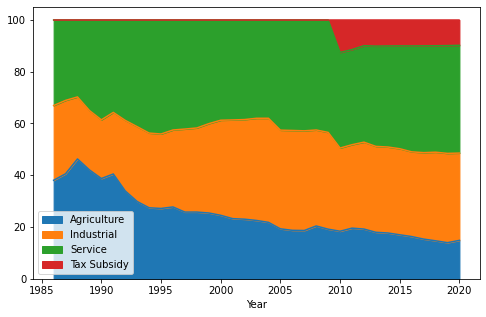

In [90]:
#stacked area chart
df_structure = df.iloc[:,[0,7,8,9,10]]
df_structure.iloc[:,1:] = df_structure.iloc[:,1:].astype(float)
df_structure.columns = ['Year', 'Agriculture', 'Industrial', 'Service', 'Tax Subsidy']
df_structure.plot.area(x='Year', y=['Agriculture', 'Industrial', 'Service', 'Tax Subsidy'], stacked=True, figsize=(8,5))